### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : ethereum_classic_price.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [2]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/ethereum_classic_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,15.82,16.85,14.30,16.58,"218,190,000","1,506,490,000"
1,2017-09-04,18.54,18.71,15.37,15.84,"243,535,000","1,764,650,000"
2,2017-09-03,20.18,20.47,18.07,18.57,"221,986,000","1,920,050,000"
3,2017-09-02,22.04,23.68,18.18,20.08,"648,787,000","2,096,550,000"
4,2017-09-01,16.40,22.45,16.32,21.94,"821,440,000","1,559,510,000"


In [3]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [5]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 409 entries, 2017-09-05 to 2016-07-24
Data columns (total 6 columns):
Open          409 non-null float64
High          409 non-null float64
Low           409 non-null float64
Close         409 non-null float64
Volume        409 non-null object
Market Cap    409 non-null object
dtypes: float64(4), object(2)
memory usage: 22.4+ KB


- The data frame has 409 entries and 6 columns. 
- All columns has 409 elements, probably there's no missing data. Especially for Open, high, Low, and Close. To make it sure, We'll see for this
- Volume and Market Cap's data type are an object, it should be number.

In [6]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)

In [7]:
# Count missing data in each column
df1.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    1
dtype: int64

#### 2. Cleaning Data Part (Deal with Wrong Format)

Problem :
- Some data has different format, therefore Volume and Market Cap recognize as a string, not a number.
- There are missing data (1 Data)

Solution:
- Convert to float number
- Using Fillna or interpolation Method

In [8]:
print('Volume Data Type :', type(df1.Volume[0]))
print('Market Cap Data Type :', type(df1['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [9]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)
df1['Market Cap'] = df1['Market Cap'].apply(convert_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 409 entries, 2017-09-05 to 2016-07-24
Data columns (total 6 columns):
Open          409 non-null float64
High          409 non-null float64
Low           409 non-null float64
Close         409 non-null float64
Volume        409 non-null int64
Market Cap    408 non-null float64
dtypes: float64(5), int64(1)
memory usage: 42.4 KB


In [10]:
df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,409.000000,409.000000,409.000000,409.000000,4.090000e+02,4.080000e+02
mean,5.775844,6.094761,5.475332,5.812246,4.833992e+07,5.338094e+08
std,6.794953,7.170771,6.398472,6.806962,1.008472e+08,6.388339e+08
min,0.604737,0.766068,0.452446,0.602402,2.673670e+05,4.976830e+07
25%,1.210000,1.240000,1.170000,1.210000,1.366170e+06,1.045622e+08
50%,1.610000,1.740000,1.440000,1.610000,5.549740e+06,1.358010e+08
75%,13.690000,14.110000,12.250000,13.810000,5.243400e+07,1.294485e+09
max,23.030000,24.620000,21.970000,23.270000,8.214400e+08,2.135600e+09


In [11]:
df1.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2016-07-28,1.560000,1.920000,1.370000,1.730000,40291300,128530000.0
2016-07-27,2.460000,2.460000,1.260000,1.600000,62645700,202315000.0
2016-07-26,0.604737,2.850000,0.600358,2.550000,103066000,49768300.0
2016-07-25,0.931993,0.932862,0.452446,0.602402,9308400,76700600.0
2016-07-24,0.752345,0.959354,0.737342,0.928814,17769300,NaN


#### 3. Cleaning Data 2 (Deal with Missing Data)

In [12]:
#new_df is the data with non NaN value
new_df = df1[np.isfinite(df1['Market Cap'])]
new_df.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2016-07-29,1.710000,1.800000,1.550000,1.640000,20745500,140887000.0
2016-07-28,1.560000,1.920000,1.370000,1.730000,40291300,128530000.0
2016-07-27,2.460000,2.460000,1.260000,1.600000,62645700,202315000.0
2016-07-26,0.604737,2.850000,0.600358,2.550000,103066000,49768300.0
2016-07-25,0.931993,0.932862,0.452446,0.602402,9308400,76700600.0


In [13]:
# Lets see the correlation between each column
correlation = new_df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.994666,0.996921,0.993347,0.686222,0.999885
High,0.994666,1.000000,0.992387,0.997626,0.736228,0.994373
Low,0.996921,0.992387,1.000000,0.994867,0.665171,0.997050
Close,0.993347,0.997626,0.994867,1.000000,0.712638,0.993213
Volume,0.686222,0.736228,0.665171,0.712638,1.000000,0.685504
Market Cap,0.999885,0.994373,0.997050,0.993213,0.685504,1.000000


In the data frame above, we can inferred that Market Cap has a strong relationship (Linear) with Open.

In [14]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = new_df[['Open']]
Market_Cap  = new_df['Market Cap']

In [15]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# Model Score
model.score(Open, Market_Cap)

0.999769768196787

In [17]:
# Fill Missing Data Using linear model prediction 
# and Assign it to new column
open = df1[['Open']]
market_cap_predict = model.predict(open) 
df1['Market Cap Predict'] = market_cap_predict.astype('int64')
df1[df1['Market Cap'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
Date,,,,,,,
2016-07-24,0.752345,0.959354,0.737342,0.928814,17769300,NaN,60679985


#### 4. Data Visualization

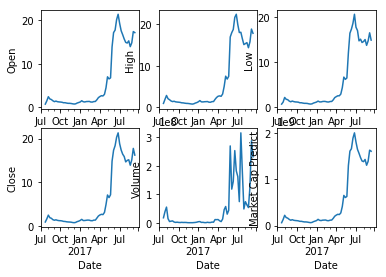

In [18]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df1.Volume.resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap Predict')
df1['Market Cap Predict'].resample('W').mean().plot()